In [118]:
# -*- coding: utf-8 -*-
%matplotlib inline
from requests_html import HTMLSession
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

url = 'http://opendata2.epa.gov.tw/UV/UV.json'
r = requests.get(url)
#利用json.loads()解碼JSON
reqsjson = json.loads(r.text)

#Sitename = {'淡水':0, '板橋':0, '桃園':0, '苗栗':0, '沙鹿':0, '彰化':0, '南投':0, '斗六':0, 
#            '塔塔加':0, '朴子':0, '新營':0, '橋頭':0, '屏東':0, '嘉義':0, '臺中':0, '澎湖':0,
#            '宜蘭':0, '金門':0, '日月潭':0, '臺東':0, '蘭嶼':0, '新屋':0, '基隆':0, '成功':0, 
#            '臺北':0, '恆春':0, '鞍部':0, '新竹':0, '臺南':0, '玉山':0, '高雄':0, '馬祖':0, '花蓮':0}
County = []
PublishAgency = []
PublishTime = []
Latitude = []
Longitude = []
Sitelist_ch = []
Sitelist = []
Uvi=[]

d = {'淡水': 'Tamsui', 
     '板橋': 'Banqiao', 
     '桃園': 'Taoyuan', 
     '苗栗': 'Miaoli', 
     '沙鹿': 'Shalu', 
     '彰化': 'Changhua', 
     '南投': 'Nantou', 
     '斗六': 'Douliu',
     '塔塔加': 'Tatajia', 
     '朴子': 'Puzi', 
     '新營': 'Xinying', 
     '橋頭': 'Qiaotou', 
     '屏東': 'Pingtung', 
     '嘉義': 'Chiayi', 
     '臺中': 'Taizhong', 
     '澎湖': 'Penghu',
     '宜蘭': 'Yilan', 
     '金門': 'Kinmen', 
     '日月潭': 'Sun Moon Lake',
     '臺東': 'Taitung',
     '蘭嶼': 'Lanyu', 
     '新屋': 'Xinwu', 
     '基隆': 'Keelung', 
     '成功': 'Chenggung',
     '臺北': 'Taipei', 
     '恆春': 'Hengchun',
     '鞍部': 'Anbu', 
     '新竹': 'Hsinchu', 
     '臺南': 'Tainan', 
     '玉山': 'Mt. Jade',
     '高雄': 'Kaohsiung', 
     '馬祖': 'Matsu',
     '花蓮': 'Hualien'}

for content in reqsjson:
    if (content['UVI']==''):
        pass
    else:
        #Sitename[content['SiteName']]+= float(content['UVI'])
        County.append(content['County'])
        PublishAgency.append(content['PublishAgency'])
        PublishTime.append(content['PublishTime'])
        Sitelist_ch.append(content['SiteName'])
        Sitelist.append(d [content['SiteName']] )
        Uvi.append(content['UVI'])
        Latitude.append(content['WGS84Lat'])
        Longitude.append(content['WGS84Lon'])

    
#Site = ['Tamsui', 'Banqiao', 'Taoyuan', 'Miaoli', 'Shalu', 'Changhua', 'Nantou', 'Douliu',
#         'Tatajia', 'Puzi', 'Xinying', 'Qiaotou', 'Pingtung', 'Chiayi', 'Taizhong', 'Penghu',
#         'Yilan', 'Kinmen', 'Sun Moon Lake', 'Taitung', 'Lanyu', 'Xinwu', 'Keelung', 'Chenggung',
#         'Taipei', 'Hengchun', 'Anbu', 'Hsinchu', 'Tainan', 'Mt. Jade', 'Kaohsiung', 'Matsu',
#         'Hualien']


#for key in Sitename.items():
#    Uvi.append(key[1])

df=pd.DataFrame({'Country' : County,
                 'Publish Agency' : PublishAgency,
                 'Publish Time' : PublishTime,
                 'Site Name (Zh-TW)': Sitelist_ch,
                 'Site Name (EN)' : Sitelist,
                 'UVI' : Uvi,
                 'Latitude' : Latitude,
                 'Longitude' : Longitude})


In [119]:
df
#df.head()

,Country,Publish Agency,Publish Time,Site Name (Zh-TW),Site Name (EN),UVI,Latitude,Longitude
0,嘉義市,中央氣象局,2018-07-31 08:00,嘉義,Chiayi,1.39,"23,29,45","120,25,58"
1,臺中市,中央氣象局,2018-07-31 08:00,臺中,Taizhong,0.85,"24,08,45","120,41,03"
2,澎湖縣,中央氣象局,2018-07-31 08:00,澎湖,Penghu,1.47,"23,33,56","119,33,47"
3,宜蘭縣,中央氣象局,2018-07-31 08:00,宜蘭,Yilan,1.46,"24,45,50","121,45,24"
4,金門縣,中央氣象局,2018-07-31 08:00,金門,Kinmen,1.02,"24,24,26","118,17,21"
5,南投縣,中央氣象局,2018-07-31 08:00,日月潭,Sun Moon Lake,1.33,"23,52,53","120,54,29"
6,臺東縣,中央氣象局,2018-07-31 08:00,臺東,Taitung,1.47,"22,45,08","121,09,17"
7,臺東縣,中央氣象局,2018-07-31 08:00,蘭嶼,Lanyu,1.85,"22,02,13","121,33,30"
8,桃園市,中央氣象局,2018-07-31 08:00,新屋,Xinwu,1.68,"25,00,24","121,02,51"
9,基隆市,中央氣象局,2018-07-31 08:00,基隆,Keelung,1.45,"25,07,60","121,44,26"


In [120]:
import urllib.request
import re
url_2 = 'http://opendata.cwb.gov.tw/govdownload?dataid=O-A0005-001&authorizationkey=rdec-key-123-45678-011121314'
r = urllib.request.urlopen(url_2)
bytes_data = r.read()

text = bytes_data.decode(encoding='utf-8')
pattern = r'<value>(.*?)</value>'
match_str = re.findall(pattern,text)

match_str_to_float = list(map(lambda x:float(x), match_str))
max_uvi = max(match_str_to_float)
print(max_uvi)

15.98


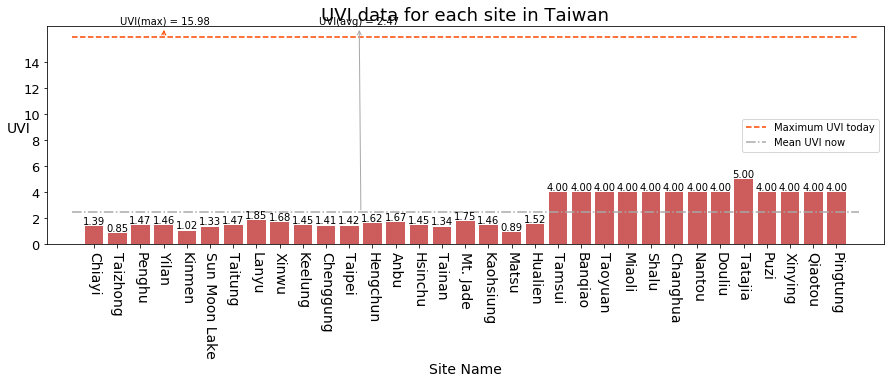

In [121]:
import statistics as s

#draw bar chart
plt.figure(figsize=(15,4))
uvi_str_to_float = list(map(lambda x:float(x), Uvi))
plt.bar( Sitelist , uvi_str_to_float ,color='IndianRed' )

plt.xticks(fontsize=14, rotation=270)
plt.yticks( range(0, 16, 2),fontsize=13)

plt.xlabel('Site Name', fontsize=14)
plt.ylabel('UVI', fontsize=14, rotation=0)

#line of max uvi
plt.axhline(y = max_uvi, xmin=0.03, xmax=0.97, color='OrangeRed', linestyle='dashed')
#plt.text(2.5 , max_uvi+1.2 , "UVI(max) = "+str(max_uvi), color='OrangeRed')
plt.annotate ("UVI(max) = "+str(max_uvi), (3,  max_uvi), (1.1,  max_uvi+1), 
              arrowprops=dict(arrowstyle='<-', color='OrangeRed'))

#line of mean uvi
mean_uvi = np.mean(uvi_str_to_float)
plt.axhline(y = mean_uvi, xmin=0.03, xmax=0.97, color='DarkGray', linestyle='dashdot')
#set a arrow 
plt.annotate ("UVI(avg) = "+str('%.2f'%mean_uvi), (11.5, mean_uvi), (9.7, max_uvi+1), 
              arrowprops=dict(arrowstyle='<-', color='DarkGray'))

plt.legend(('Maximum UVI today', 'Mean UVI now'), loc='best')

plt.title('UVI data for each site in Taiwan', fontsize=18)

for x,y in zip( Sitelist , uvi_str_to_float ):
    # ha: horizontal alignment
    # va: vertical alignment
    plt.text( x , y ,'%.2f'%y , ha='center', va='bottom' )

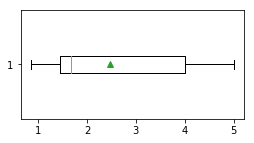

In [122]:
#import seaborn as sns
plt.figure(figsize=(4,2))
plt.boxplot(uvi_str_to_float,sym='rs',vert=False,meanline=False,showmeans=True) #代表非常態分配(均!=中位)，這裡均>中位(有大極端)
plt.show()

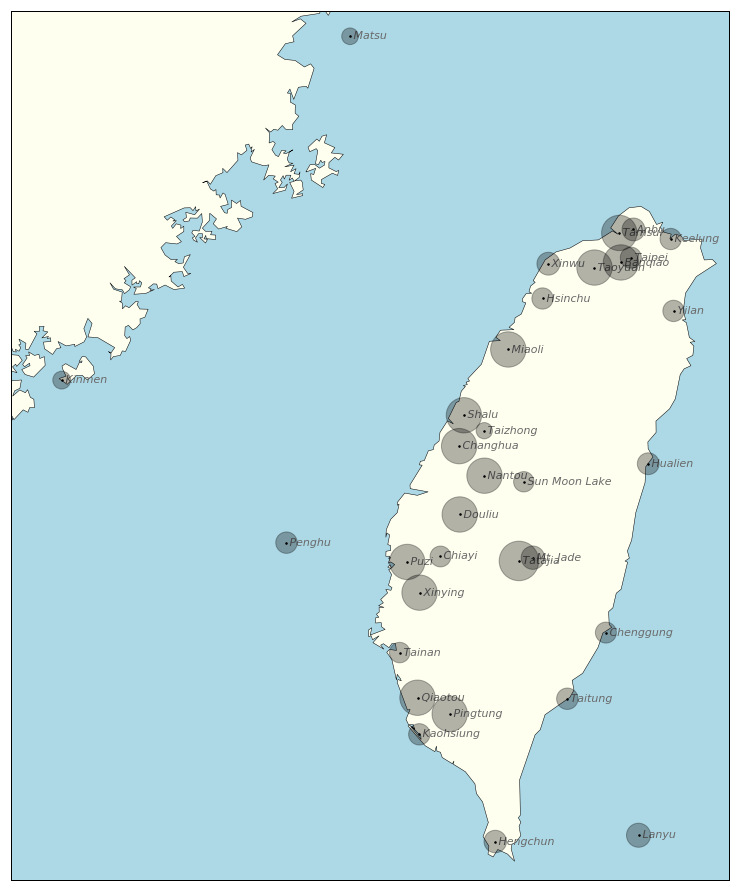

In [123]:
from mpl_toolkits.basemap import Basemap
import shapefile
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 16.0) 

m = Basemap()
m = Basemap(projection='merc', resolution='i',llcrnrlon=118.0, llcrnrlat=21.8, urcrnrlon=122.07, urcrnrlat=26.3)
m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='LightBlue')
m.fillcontinents(color='Ivory',lake_color='blue')

#plt.figure(figsize = (5,13.5))
#m.readshapefile('http://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=72874C55-884D-4CEA-B7D6-F60B0BE85AB0', name,linewidth=0.25 , drawbounds=True)

#pop = np.array(Uvi,dtype=float)    # 获取人口数，转化为numpy浮点型 
hexcolors = []
#for i in range(len(x)):
#    hexcolors.append('#%02x%02x%02x' % (int((255*sumlist[i])/max(sumlist)),0,0))

for lat,long,place,uvi in zip(Latitude,Longitude,Sitelist,uvi_str_to_float):
    degree_long = int(long.split(',')[0])
    minute_long = float(long.split(',')[1])
    second_long = float(long.split(',')[2])
    site_long = degree_long + minute_long/(60) + second_long/(60*60)
    
    degree_lat = int(lat.split(',')[0])
    minute_lat = float(lat.split(',')[1])
    second_lat = float(lat.split(',')[2])
    site_lat = degree_lat + minute_lat/(60) + second_lat/(60*60)
    
    size=(uvi/max_uvi)*5000
    x = int(size/5000)
    hexcolors.append('#%02x%02x%02x' %(x,1,1))
    size = np.nan_to_num(size)   

    x,y=m(site_long,site_lat)
    plt.plot(x,y,'ok',markersize=1.5)
    plt.text(x,y," "+place,fontsize=11,color='DimGray',style='italic',va='center')
    #plt.scatter(x,y,s=size,color='MidnightBlue')
    
    # use zonder to let scatter stuff cover land and c must be a list
    m.scatter(site_long,site_lat, latlon=True, s=size, c=hexcolors , alpha=0.3, zorder=10)
